# AnnGroups

This is just a test script to verify that the ANN code works as expected. It also serves as an example
for the usage.

It is **NOT** used for results reported in the article.

In [1]:
# import stuffs
%matplotlib inline
import numpy as np
import pandas as pd
from pyplotthemes import get_savefig, classictheme as plt
plt.latex = True

## Load some data

In [2]:
from datasets import get_pbc

d = get_pbc(prints=True, norm_in=True, norm_out=False)

durcol = d.columns[0]
eventcol = d.columns[1]

if np.any(d[durcol] < 0):
    raise ValueError("Negative times encountered")

# Sort the data before training - handled by ensemble
#d.sort(d.columns[0], inplace=True)

# Example: d.iloc[:, :2] for times, events
d

Input columns were normalized
Shape from (312, 19) to (312, 19)
Censored count: 187.0 / 312  = 59.94%
Final columns: ['time', 'status', 'trt', 'age', 'sex', 'ascites', 'hepato', 'spiders', 'edema', 'bili', 'chol', 'albumin', 'copper', 'alk.phos', 'ast', 'trig', 'platelet', 'protime', 'stage']


,time,status,trt,age,sex,ascites,hepato,spiders,edema,bili,chol,albumin,copper,alk.phos,ast,trig,platelet,protime,stage
0,400,1,-1,0.826577,-1,1,1,1,3.240076,2.481927,-4.678298e-01,-2.191039,0.681567,-0.123648,0.271495,7.259994e-01,-7.523900e-01,1.468012,1.102598
1,4500,0,-1,0.607419,-1,-1,1,1,-0.402820,-0.475925,-2.910634e-01,1.476570,-0.509828,2.528580,-0.159373,-5.633599e-01,-4.281519e-01,-0.125100,-0.036510
2,1012,1,-1,1.895194,1,-1,-1,-1,1.418628,-0.409704,-8.342967e-01,-0.095263,1.312305,-0.685229,-0.466606,-1.069894e+00,-1.160303e+00,1.268873,1.102598
3,1925,1,-1,0.446221,-1,-1,1,1,1.418628,-0.321410,-5.411232e-01,-2.333933,-0.393025,1.933828,-1.092185,-5.019618e-01,-8.256051e-01,-0.423809,1.102598
4,1504,0,1,-1.125915,-1,-1,1,1,-0.402820,0.031766,-3.902250e-01,0.023816,0.529722,-0.612812,-0.165898,-8.089521e-01,-1.317192e+00,0.173608,-0.036510
5,2503,1,1,1.534762,-1,-1,1,-1,-0.402820,-0.542145,-5.238777e-01,1.095520,-0.556550,-0.485265,-0.521280,-9.470977e-01,5.046468e-17,0.273178,-0.036510
6,1832,0,1,0.521257,-1,-1,1,-1,-0.402820,-0.497998,-2.048359e-01,1.357492,-0.533189,-0.541330,-1.095359,1.355330e+00,-6.059599e-01,-1.021226,-0.036510
7,2466,1,1,0.287093,-1,-1,-1,-1,-0.402820,-0.652513,-3.859136e-01,1.143151,-0.533189,1.246757,-1.660972,9.869411e-01,1.161661e+00,0.273178,-0.036510
8,2400,1,-1,-0.709853,-1,-1,-1,1,-0.402820,-0.012381,8.298942e-01,-1.047888,-0.217820,0.137052,0.380844,-5.633599e-01,-1.143731e-01,0.273178,-1.175617
9,51,1,1,1.941251,-1,1,-1,1,3.240076,2.062530,-7.308237e-01,-1.857620,0.494681,-0.497412,0.435518,2.808635e-01,4.190510e-01,0.771026,1.102598


## Create an ANN model

With all correct parameters, ensemble settings and such.

In [6]:
import ann
from classensemble import ClassEnsemble

mingroup = int(0.25 * d.shape[0])

def get_net(func=ann.geneticnetwork.FITNESS_SURV_KAPLAN_MIN):
    hidden_count = 10
    outcount = 2
    l = (d.shape[1] - 2) + hidden_count + outcount + 1

    net = ann.geneticnetwork((d.shape[1] - 2), hidden_count, outcount)
    net.fitness_function = func
    net.mingroup = mingroup
    # Be explicit here even though I changed the defaults
    net.connection_mutation_chance = 0.0
    net.activation_mutation_chance = 0
    # Some other values
    net.crossover_method = net.CROSSOVER_UNIFORM
    net.selection_method = net.SELECTION_TOURNAMENT
    net.population_size = 100
    net.generations = 1000
    net.weight_mutation_chance = 0.15
    net.dropout_hidden_probability = 0.5
    net.dropout_input_probability = 0.8


    ann.utils.connect_feedforward(net, [5, 5], hidden_act=net.TANH, out_act=net.SOFTMAX)
    #c = net.connections.reshape((l, l))
    #c[-outcount:, :((d.shape[1] - 2) + hidden_count)] = 1
    #net.connections = c.ravel()
    
    return net

net = get_net()
l = (d.shape[1] - 2) + net.hidden_count + 2 + 1
print(net.connections.reshape((l, l)))

hnets = []
lnets = []

netcount = 2
for i in range(netcount):
    if i % 2:
        n = get_net(ann.geneticnetwork.FITNESS_SURV_KAPLAN_MIN)
        hnets.append(n)
    else:
        n = get_net(ann.geneticnetwork.FITNESS_SURV_KAPLAN_MAX)
        lnets.append(n)
    

e = ClassEnsemble(hnets, lnets)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0

## Train the ANNs

And print groupings on training data.

In [7]:
e.fit(d, durcol, eventcol)

# grouplabels = e.predict_classes
grouplabels, mems = e.label_data(d)
for l, m in mems.items():
    print("Group", l, "has", len(m), "members")

Group mid has 65 members
Group high has 98 members
Group low has 149 members


## Plot grouping

End survival rate for high : 0.0552268854922
Median survival for high : 999.0
End survival rate for mid : 0.180355736489
Median survival for mid : 3222.0
End survival rate for low : 0.784319884544


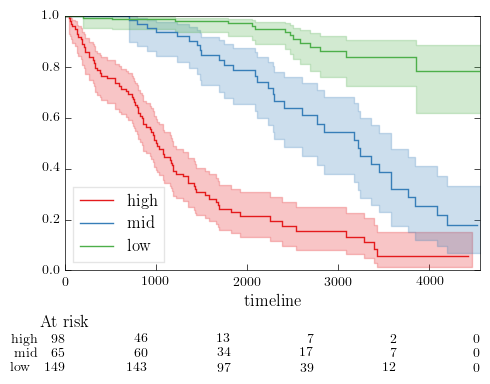

In [8]:
from lifelines.plotting import add_at_risk_counts
from lifelines.estimation import KaplanMeierFitter
from lifelines.estimation import median_survival_times

plt.figure()

fitters = []
for g in ['high', 'mid', 'low']:
    kmf = KaplanMeierFitter()
    fitters.append(kmf)
    members = grouplabels == g
        
    kmf.fit(d.loc[members, durcol],
            d.loc[members, eventcol],
            label='{}'.format(g))
    kmf.plot(ax=plt.gca())#, color=plt.colors[mi])
    print("End survival rate for", g, ":",kmf.survival_function_.iloc[-1, 0])
    if kmf.survival_function_.iloc[-1, 0] <= 0.5:
        print("Median survival for", g, ":",
              median_survival_times(kmf.survival_function_))
    
plt.legend(loc='best', framealpha=0.1)    

plt.ylim((0, 1))
add_at_risk_counts(*fitters)